In [1]:
!pip install spacepy
!pip install cdflib
!pip install matplotlib
import numpy as np
import math


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from spacepy import pycdf
import cdflib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
#dmsp-f16_ssm_magnetometer_20130601_v1.0.4.cdf
![Binder](https://mybinder.org/badge_logo.svg)(https://mybinder.org/v2/gh/lkilcommons/OvationPyme/HEAD?labpath=notebooks%2FInteractiveWithHemisphericPower.ipynb)


"[Binder]" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


CDFInfo(CDF=WindowsPath('C:/Users/benja/OneDrive/Documentos/python/Proyecto_OvationPyme/dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf'), Version='2.7.2', Encoding=1, Majority='Column_major', rVariables=[], zVariables=['Epoch', 'ELE_COUNTS_OBS', 'ELE_COUNTS_BKG', 'ELE_DIFF_ENERGY_FLUX', 'ELE_DIFF_ENERGY_FLUX_STD', 'ELE_TOTAL_ENERGY_FLUX', 'ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY', 'ELE_AVG_ENERGY_STD', 'ION_COUNTS_OBS', 'ION_COUNTS_BKG', 'ION_DIFF_ENERGY_FLUX', 'ION_DIFF_ENERGY_FLUX_STD', 'ION_TOTAL_ENERGY_FLUX', 'ION_TOTAL_ENERGY_FLUX_STD', 'ION_AVG_ENERGY', 'ION_AVG_ENERGY_STD', 'SC_ECI', 'SC_GEOCENTRIC_LAT', 'SC_GEOCENTRIC_LON', 'SC_GEOCENTRIC_R', 'SC_AACGM_LAT', 'SC_AACGM_LON', 'SC_AACGM_LTIME', 'CHANNEL_ENERGIES', 'metavar0'], Attributes=[{'Project': 'Global'}, {'Source_name': 'Global'}, {'Discipline': 'Global'}, {'Data_type': 'Global'}, {'Descriptor': 'Global'}, {'File_naming_convention': 'Global'}, {'Data_version': 'Global'}, {'PI_name': 

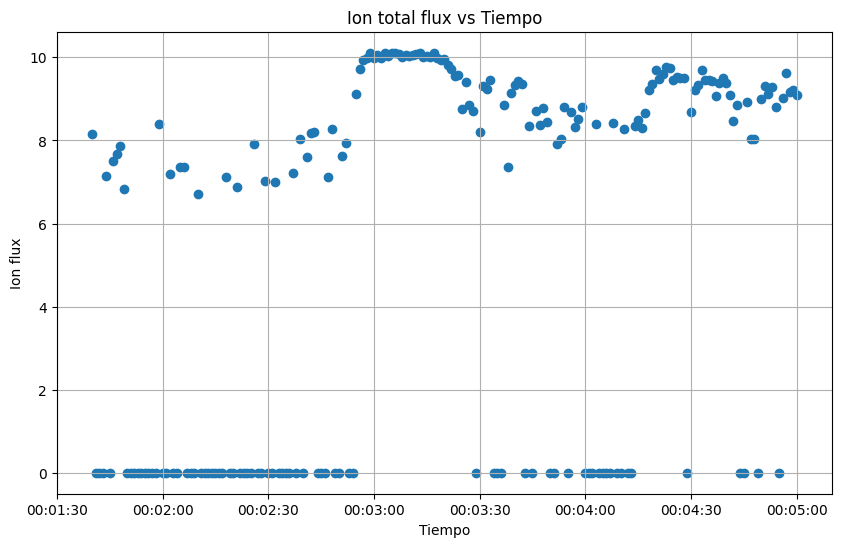

In [3]:
archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')
info = archivo.cdf_info()

print(info)
tiempo = archivo.varget('Epoch')
total_i_flux = archivo.varget('ION_TOTAL_ENERGY_FLUX')
N1=100
N2=300
log_i_flux=[]
I=N1
for elem in total_i_flux:
    if I <= N2:
        if elem > 0:
            log_i_flux.append(math.log10(elem))
            I+=1

        else:
            log_i_flux.append(elem)
            I+=1
#necesario para que sea legible
tiempo_final = cdflib.cdfepoch.to_datetime(tiempo)

plt.figure(figsize=(10, 6))
plt.scatter(tiempo_final[N1:N2+1],log_i_flux)
plt.xlabel('Tiempo')
plt.ylabel('Ion flux')
plt.title('Ion total flux vs Tiempo')
plt.grid(True)
plt.show()
# Carga el archivo CDF
archivo_cdf = "ruta/del/archivo.cdf"

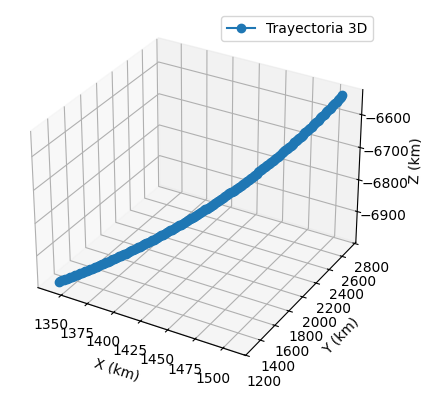

In [4]:
# Carga del archivo CDF
archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')

# Obtener las variables
latitud = archivo.varget('SC_GEOCENTRIC_LAT')  # Latitud en grados
longitud = archivo.varget('SC_GEOCENTRIC_LON')  # Longitud en grados
altitud = archivo.varget("SC_GEOCENTRIC_R")  # Radio geocéntrico en km

# Selección de rango de datos
N1, N2 = 100, 300

# Convertir latitud y longitud de grados a radianes
lat_rad = np.radians(latitud[N1:N2+1])
lon_rad = np.radians(longitud[N1:N2+1])
r = altitud[N1:N2+1]

# Conversión a coordenadas cartesianas
x = r * np.cos(lat_rad) * np.cos(lon_rad)
y = r * np.cos(lat_rad) * np.sin(lon_rad)
z = r * np.sin(lat_rad)

# Graficar la trayectoria en 3D
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(x, y, z, label="Trayectoria 3D", marker="o")

# Etiquetas y leyenda
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Z (km)")
plt.legend()
plt.show()

Variables disponibles: ['Epoch', 'ELE_COUNTS_OBS', 'ELE_COUNTS_BKG', 'ELE_DIFF_ENERGY_FLUX', 'ELE_DIFF_ENERGY_FLUX_STD', 'ELE_TOTAL_ENERGY_FLUX', 'ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY', 'ELE_AVG_ENERGY_STD', 'ION_COUNTS_OBS', 'ION_COUNTS_BKG', 'ION_DIFF_ENERGY_FLUX', 'ION_DIFF_ENERGY_FLUX_STD', 'ION_TOTAL_ENERGY_FLUX', 'ION_TOTAL_ENERGY_FLUX_STD', 'ION_AVG_ENERGY', 'ION_AVG_ENERGY_STD', 'SC_ECI', 'SC_GEOCENTRIC_LAT', 'SC_GEOCENTRIC_LON', 'SC_GEOCENTRIC_R', 'SC_AACGM_LAT', 'SC_AACGM_LON', 'SC_AACGM_LTIME', 'CHANNEL_ENERGIES', 'metavar0']
Índice del pico: 12468
Flujo máximo: 3435893.5
Energías en el rango 2bi: [30.]
Latitud magnética del pico: 64.18552996478947


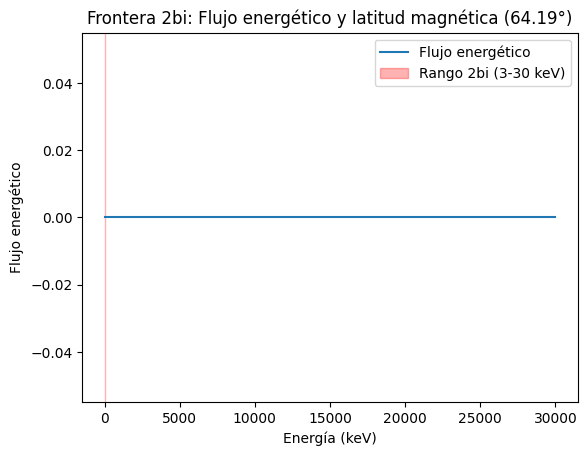

In [7]:
import cdflib
import numpy as np
import matplotlib.pyplot as plt

# Ruta al archivo CDF (cambiar a la ruta correspondiente)
cdf_file_path = "dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf"

# Cargar archivo CDF
cdf = cdflib.CDF(cdf_file_path)

# Listar las variables disponibles en el archivo
variables = cdf.cdf_info().zVariables
print("Variables disponibles:", variables)

# Variables relevantes
# - Energía de los canales de iones
ion_energy = cdf.varget("CHANNEL_ENERGIES")  # Energías de los canales (keV)
# - Flujo diferencial de energía de los iones
ion_flux = cdf.varget("ION_DIFF_ENERGY_FLUX")  # Flujo de energía diferencial
# - Latitud magnética
mag_lat = cdf.varget("SC_AACGM_LAT")  # Latitud magnética asociada a cada instante

# Validar dimensiones
if ion_flux.shape[0] != len(mag_lat):
    raise ValueError("Dimensiones inconsistentes entre flujo de iones y latitud magnética.")

def filter_by_latitude(latitudes, flux, lat_range):
    """
    Filtra los datos de flujo y latitudes según un rango de latitudes.

    :param latitudes: Array de latitudes magnéticas.
    :param flux: Matriz de flujo energético (dimensiones: tiempo x energía).
    :param lat_range: Tupla con el rango de latitudes (min_lat, max_lat).
    :return: Subconjunto de latitudes y flujos dentro del rango especificado.
    """
    min_lat, max_lat = lat_range
    valid_indices = np.where((latitudes >= min_lat) & (latitudes <= max_lat))[0]
    return latitudes[valid_indices], flux[valid_indices, :]

def find_2bi_boundary(ion_energy, ion_flux, mag_lat, lat_range):
    """
    Identifica la frontera 2bi buscando el pico de flujo energético integrado
    en el rango de energía 3-30 keV y determina su posición en latitud magnética.

    :param ion_energy: Array de energías de los iones (keV).
    :param ion_flux: Matriz de flujo energético (dimensiones: tiempo x energía).
    :param mag_lat: Array de latitudes magnéticas asociadas a cada instante de tiempo.
    :param lat_range: Tupla con el rango de latitudes (min_lat, max_lat).
    :return: Índice de tiempo, valor de flujo máximo, energías del rango, y latitud magnética del pico.
    """
    # Filtrar datos por latitud
    filtered_lat, filtered_flux = filter_by_latitude(mag_lat, ion_flux, lat_range)

    # Definir el rango de energía relevante
    min_energy, max_energy = 3, 30

    # Filtrar energías dentro del rango
    valid_indices = np.where((ion_energy >= min_energy) & (ion_energy <= max_energy))[0]
    

    if len(valid_indices) == 0:
        raise ValueError("No se encontraron energías en el rango especificado.")

    # Integrar el flujo energético en el rango seleccionado
    integrated_flux = filtered_flux[:, valid_indices].sum(axis=1)

    # Encontrar el pico del flujo integrado
    peak_index = np.argmax(integrated_flux)
    peak_flux = integrated_flux[peak_index]

    # Energías correspondientes al rango seleccionado
    peak_energy = ion_energy[valid_indices]

    # Latitud magnética asociada al pico
    peak_latitude = filtered_lat[peak_index]

    return peak_index, peak_flux, peak_energy, peak_latitude

# Definir rango de latitudes relevante (50° a 80°)
latitude_range = (50, 80)

# Llamar a la función para encontrar la frontera 2bi
try:
    peak_index, peak_flux, peak_energy, peak_latitude = find_2bi_boundary(ion_energy, ion_flux, mag_lat, latitude_range)
    print(f"Índice del pico: {peak_index}")
    print(f"Flujo máximo: {peak_flux}")
    print(f"Energías en el rango 2bi: {peak_energy}")
    print(f"Latitud magnética del pico: {peak_latitude}")

    # Graficar el flujo energético integrado
    plt.plot(ion_energy, ion_flux[peak_index, :], label="Flujo energético")
    plt.axvspan(3, 30, color='red', alpha=0.3, label="Rango 2bi (3-30 keV)")
    plt.title(f"Frontera 2bi: Flujo energético y latitud magnética ({peak_latitude:.2f}°)")
    plt.xlabel("Energía (keV)")
    plt.ylabel("Flujo energético")
    plt.legend()
    plt.show()

except Exception as e:
    print("Error al procesar los datos:", e)
    


Índice del pico: 79347
Flujo máximo integrado: 137203888.0
Latitud magnética correspondiente: -64.59436120860413


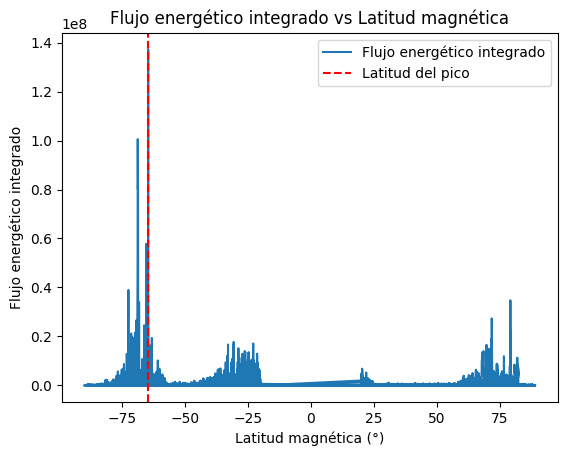

In [12]:
# Ajustar el rango de energía
min_energy, max_energy = 30, 300  # Rango ajustado a 30–300 keV

# Filtrar energías dentro del rango ajustado
valid_indices = np.where((ion_energy >= min_energy) & (ion_energy <= max_energy))[0]

if len(valid_indices) > 0:
    ion_flux = np.nan_to_num(ion_flux)  # Reemplaza NaN con 0
    if len(valid_indices) > 0:
        integrated_flux = np.nansum(ion_flux[:, valid_indices], axis=1)


    # Integrar el flujo energético en el rango ajustado
    integrated_flux = ion_flux[:, valid_indices].sum(axis=1)

    # Encontrar el pico del flujo integrado
    peak_index = np.argmax(integrated_flux)
    peak_flux = integrated_flux[peak_index]

    # Obtener la latitud magnética correspondiente
    peak_latitude = mag_lat[peak_index]

    print(f"Índice del pico: {peak_index}")
    print(f"Flujo máximo integrado: {peak_flux}")
    print(f"Latitud magnética correspondiente: {peak_latitude}")

    # Graficar el flujo energético integrado contra la latitud magnética
    plt.plot(mag_lat, integrated_flux, label="Flujo energético integrado")
    plt.axvline(peak_latitude, color='red', linestyle='--', label="Latitud del pico")
    plt.title("Flujo energético integrado vs Latitud magnética")
    plt.xlabel("Latitud magnética (°)")
    plt.ylabel("Flujo energético integrado")
    plt.legend()
    plt.show()
else:
    print("No se encontraron energías en el rango ajustado.")
